In [74]:
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [8]:
data = pd.read_csv("data/Housing.csv")

In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
# check for NULL values. No null values found
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Text(0.5, 1.0, 'Area VS Price')

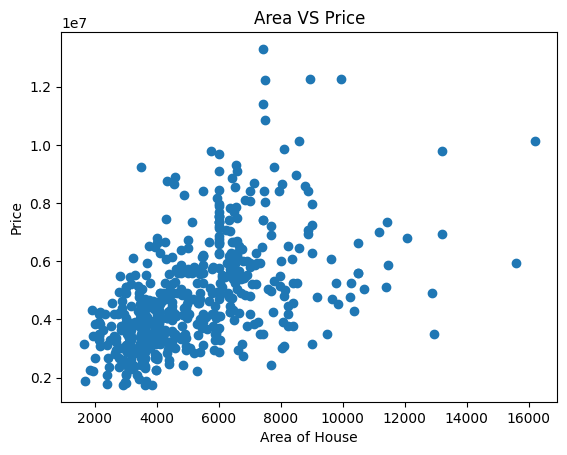

In [13]:
plt.scatter(data['area'], data['price'])
plt.xlabel("Area of House")
plt.ylabel("Price")
plt.title("Area VS Price")

Text(0.5, 1.0, 'No. of bedrooms VS Price')

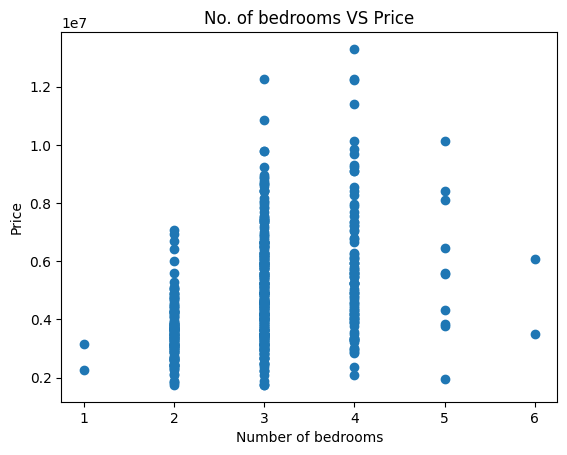

In [14]:
plt.scatter(data['bedrooms'], data['price'])
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.title("No. of bedrooms VS Price")

Text(0.5, 1.0, 'Stories VS Price')

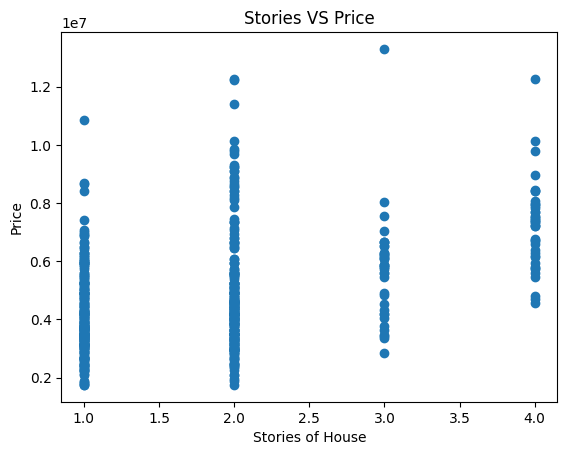

In [15]:
plt.scatter(data['stories'], data['price'])
plt.xlabel("Stories of House")
plt.ylabel("Price")
plt.title("Stories VS Price")

Text(0.5, 1.0, 'Parking VS Price')

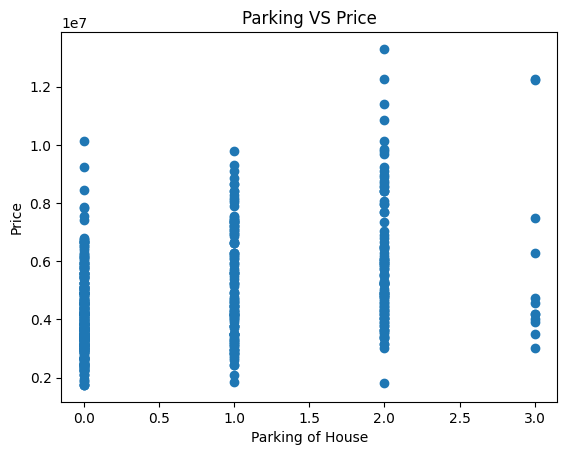

In [16]:
plt.scatter(data['parking'], data['price'])
plt.xlabel("Parking of House")
plt.ylabel("Price")
plt.title("Parking VS Price")

/tmp/ipykernel_6176/3927584707.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)


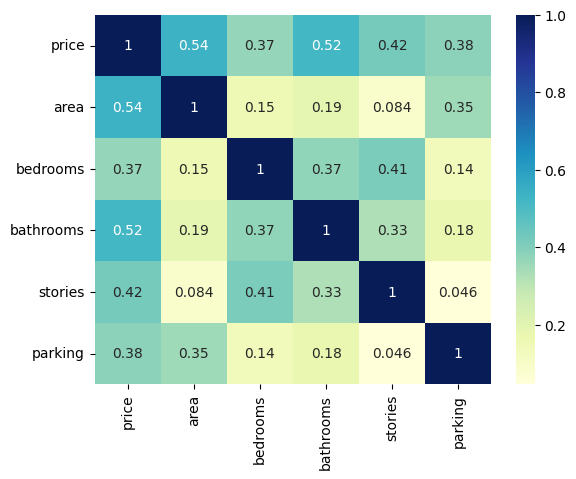

In [17]:
# Visualizing the data using heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [57]:
# Prepare data
X = data[["area", "bedrooms", "bathrooms", "stories", "parking"]]
y = data["price"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size = 0.2, random_state = 5)

In [70]:
X_train.shape
# y_train.shape
# X_test.shape
# y_test.shape

(436, 5)

In [71]:
model = LinearRegression()
model.fit(X_train,  y_train)

LinearRegression()

In [72]:
pred = model.predict(X_test)

In [75]:
print("MSE: {}".format(mean_squared_error(y_test, pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test, pred))))
print("MAE: {}".format(mean_absolute_error(y_test, pred)))

MSE: 1155937048364.4158
RMSE: 1075145.1289776724
MAE: 835335.7809293873


In [85]:
scaler = StandardScaler()
data_trans = scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data_trans, y,  
                                                    test_size = 0.2, random_state = 5)

model = LinearRegression()
model.fit(X_train,  y_train)

LinearRegression()

In [87]:
pred = model.predict(X_test)

In [88]:
print("MSE: {}".format(mean_squared_error(y_test, pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test, pred))))
print("MAE: {}".format(mean_absolute_error(y_test, pred)))

MSE: 1155937048364.4102
RMSE: 1075145.1289776699
MAE: 835335.7809293858
